In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('transformerTest.csv')
df

,experiment,epoch,loss,date,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
0,resnet18_bs64_ft0_l3_h1,14,41.960313,2020-04-17 05:43:16.706420,0.590760,0.403518,0.268719,0.175951,0.185485,0.426227,0.433569
1,resnet18_bs64_ft0_l5_h1,16,39.051531,2020-04-17 08:04:03.627139,0.588656,0.403763,0.270567,0.178124,0.186499,0.430255,0.443502
2,resnet18_bs64_ft0_l7_h1,11,41.097594,2020-04-17 10:16:25.287667,0.601002,0.414493,0.274843,0.181629,0.183420,0.433461,0.452379
3,resnet18_bs64_ft0_l3_h2,7,45.161360,2020-04-17 11:51:25.789480,0.601001,0.413147,0.272152,0.177299,0.179166,0.429179,0.415720
4,resnet18_bs64_ft0_l5_h2,5,46.447817,2020-04-17 13:35:40.651024,0.572450,0.390381,0.256184,0.164005,0.179102,0.418984,0.404707
5,resnet18_bs64_ft0_l7_h2,8,41.888394,2020-04-17 17:48:32.246026,0.596777,0.411418,0.274775,0.179148,0.179012,0.429064,0.421231
6,resnet18_bs64_ft0_l3_h3,4,48.132885,2020-04-17 19:22:37.715955,0.588561,0.402376,0.260503,0.166788,0.177312,0.421705,0.387099
7,resnet18_bs64_ft0_l5_h3,8,41.587396,2020-04-17 21:51:52.000388,0.578905,0.393981,0.260807,0.169273,0.183595,0.425692,0.410287
8,resnet18_bs64_ft0_l7_h3,6,43.299092,2020-04-18 00:36:05.077389,0.598423,0.411754,0.272693,0.177980,0.182364,0.429983,0.442620
9,resnet18_bs64_ft1_l3_h1,14,41.424653,2020-04-18 01:33:30.143870,0.602575,0.417124,0.278093,0.182354,0.187002,0.435557,0.452781


In [3]:
exp_idx_to_label = {
  0: 'encoder',
  1: 'batch_size',
  2: 'fine_tune',
  3: 'num_layers',
  4: 'num_heads'
}

for index, row in df.iterrows():
  for exp_idx, item in enumerate(row['experiment'].split('_')):
    if exp_idx in exp_idx_to_label:
      item = int(re.sub("[^0-9]", "", item)) if exp_idx != 0 else item
      df.at[index, exp_idx_to_label[exp_idx]] = item
      
df.tail()

,experiment,epoch,loss,date,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr,encoder,batch_size,fine_tune,num_layers,num_heads
17,resnet18_bs64_ft1_l7_h3,6,41.787247,2020-04-18 14:20:53.583437,0.589363,0.403636,0.264231,0.167826,0.188835,0.434615,0.439708,resnet18,64.0,1.0,7.0,3.0
18,resnet50_bs32_ft0_l3_h1,3,42.206349,2020-04-18 16:26:30.588523,0.601477,0.416084,0.280249,0.187324,0.186576,0.439587,0.455343,resnet50,32.0,0.0,3.0,1.0
19,resnet50_bs32_ft1_l3_h1,4,36.027010,2020-04-18 18:37:03.686163,0.603460,0.412668,0.269747,0.172128,0.189022,0.434566,0.462086,resnet50,32.0,1.0,3.0,1.0
20,resnet101_bs32_ft0_l3_h1,1,52.979009,2020-04-18 20:35:11.439308,0.594601,0.408885,0.269008,0.173651,0.180138,0.424410,0.421044,resnet101,32.0,0.0,3.0,1.0
21,resnet101_bs32_ft1_l3_h1,3,37.578668,2020-04-18 23:07:05.628863,0.615548,0.434562,0.295885,0.194330,0.199317,0.451327,0.504519,resnet101,32.0,1.0,3.0,1.0


## Experiment 1: Effect of improved image feature quality

In [4]:
img_quality_df = df[(df['num_layers'] == 3) & (df['num_heads'] == 1) & (df['fine_tune'] == 0)]
img_quality_df = img_quality_df.drop(['date', 'experiment', 'epoch', 'loss', 'fine_tune'], axis = 1) 
img_quality_df = img_quality_df.set_index('encoder').reindex(["resnet18", "resnet50", "resnet101"])
img_quality_df

,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr,batch_size,num_layers,num_heads
encoder,,,,,,,,,,
resnet18,0.590760,0.403518,0.268719,0.175951,0.185485,0.426227,0.433569,64.0,3.0,1.0
resnet50,0.601477,0.416084,0.280249,0.187324,0.186576,0.439587,0.455343,32.0,3.0,1.0
resnet101,0.594601,0.408885,0.269008,0.173651,0.180138,0.424410,0.421044,32.0,3.0,1.0


Text(0.5, 1.0, 'Effect of improved image feature extraction on scores')

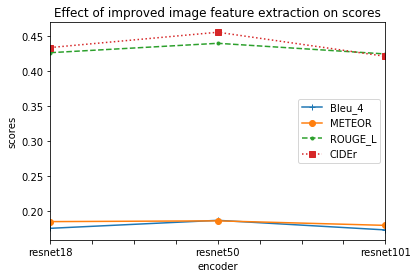

In [5]:
ax = img_quality_df[['Bleu_4', 'METEOR', 'ROUGE_L', 'CIDEr']].plot(style=['+-','o-','.--','s:'])
ax.set_ylabel("scores")
ax.set_title("Effect of improved image feature extraction on scores")

## Experiment 2: Effect of fine-tuning the encoders

In [6]:
img_quality_df = df[(df['num_layers'] == 3) & (df['num_heads'] == 1)]
print(img_quality_df.shape)
img_quality_df = img_quality_df.drop(['date', 'experiment', 'epoch', 'loss'], axis = 1) 
img_quality_df = img_quality_df.sort_values(by=['encoder', 'fine_tune'])

img_quality_df

(6, 16)


,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr,encoder,batch_size,fine_tune,num_layers,num_heads
20,0.594601,0.408885,0.269008,0.173651,0.180138,0.424410,0.421044,resnet101,32.0,0.0,3.0,1.0
21,0.615548,0.434562,0.295885,0.194330,0.199317,0.451327,0.504519,resnet101,32.0,1.0,3.0,1.0
0,0.590760,0.403518,0.268719,0.175951,0.185485,0.426227,0.433569,resnet18,64.0,0.0,3.0,1.0
9,0.602575,0.417124,0.278093,0.182354,0.187002,0.435557,0.452781,resnet18,64.0,1.0,3.0,1.0
18,0.601477,0.416084,0.280249,0.187324,0.186576,0.439587,0.455343,resnet50,32.0,0.0,3.0,1.0
19,0.603460,0.412668,0.269747,0.172128,0.189022,0.434566,0.462086,resnet50,32.0,1.0,3.0,1.0


In [7]:
finetuned_diff_df = img_quality_df.set_index(['encoder']).groupby('encoder').diff()

finetuned_diff_df = finetuned_diff_df.dropna()
finetuned_diff_df = finetuned_diff_df.reindex(["resnet18", "resnet50", "resnet101"])
finetuned_diff_df

,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr,batch_size,fine_tune,num_layers,num_heads
encoder,,,,,,,,,,,
resnet18,0.011815,0.013607,0.009374,0.006404,0.001516,0.009329,0.019212,0.0,1.0,0.0,0.0
resnet50,0.001983,-0.003415,-0.010503,-0.015197,0.002445,-0.005021,0.006743,0.0,1.0,0.0,0.0
resnet101,0.020948,0.025677,0.026877,0.020679,0.019179,0.026917,0.083474,0.0,1.0,0.0,0.0


Text(0.5, 1.0, 'Difference of scores with and without fine-tuning')

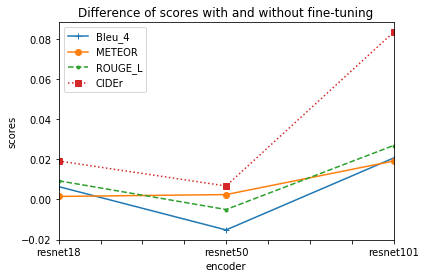

In [8]:
ax = finetuned_diff_df[['Bleu_4', 'METEOR', 'ROUGE_L', 'CIDEr']].plot(style=['+-','o-','.--','s:'])
ax.set_ylabel("scores")
ax.set_title("Difference of scores with and without fine-tuning")

## Experiment 3: Effect of varying number of layers in Transformer

Fixed Number of heads:  1


,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr,num_heads
num_layers,,,,,,,,
3.0,0.590760,0.403518,0.268719,0.175951,0.185485,0.426227,0.433569,1.0
5.0,0.588656,0.403763,0.270567,0.178124,0.186499,0.430255,0.443502,1.0
7.0,0.601002,0.414493,0.274843,0.181629,0.183420,0.433461,0.452379,1.0


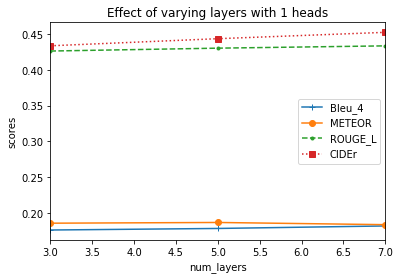

Fixed Number of heads:  2


,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr,num_heads
num_layers,,,,,,,,
3.0,0.601001,0.413147,0.272152,0.177299,0.179166,0.429179,0.415720,2.0
5.0,0.572450,0.390381,0.256184,0.164005,0.179102,0.418984,0.404707,2.0
7.0,0.596777,0.411418,0.274775,0.179148,0.179012,0.429064,0.421231,2.0


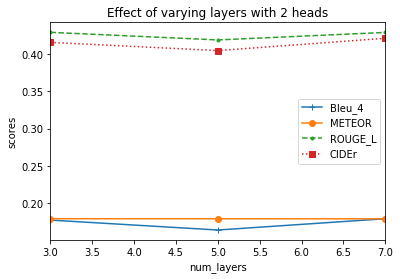

Fixed Number of heads:  3


,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr,num_heads
num_layers,,,,,,,,
3.0,0.588561,0.402376,0.260503,0.166788,0.177312,0.421705,0.387099,3.0
5.0,0.578905,0.393981,0.260807,0.169273,0.183595,0.425692,0.410287,3.0
7.0,0.598423,0.411754,0.272693,0.177980,0.182364,0.429983,0.442620,3.0


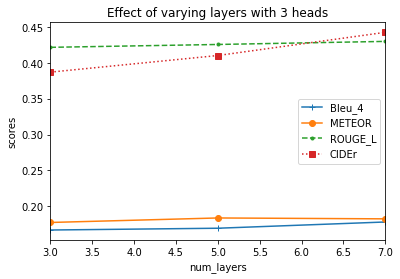

In [9]:
from IPython.display import display, HTML

for num_heads in [1,2,3]:
  num_layers_df = df[(df['fine_tune'] == 0) & (df['encoder'] == 'resnet18') & (df['num_heads'] == num_heads)] \
    .sort_values(by=['num_layers']) \
    .drop(['date', 'experiment', 'epoch', 'loss', 'fine_tune', 'batch_size', 'encoder'], axis = 1) \
    .set_index('num_layers')

  print("==================================================")
  print("Fixed Number of heads: ", num_heads)
#   print(decoder_dim_df)
  display(HTML(num_layers_df.to_html()))
  
  ax = num_layers_df[['Bleu_4', 'METEOR', 'ROUGE_L', 'CIDEr']].plot(style=['+-','o-','.--','s:'])
  ax.set_ylabel("scores")
  ax.set_title(f"Effect of varying layers with {num_heads} heads")
  plt.show()

## Experiment 4: Effect of varying number of heads in Transformer

Fixed Number of layers:  3


,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr,num_layers
num_heads,,,,,,,,
1.0,0.590760,0.403518,0.268719,0.175951,0.185485,0.426227,0.433569,3.0
2.0,0.601001,0.413147,0.272152,0.177299,0.179166,0.429179,0.415720,3.0
3.0,0.588561,0.402376,0.260503,0.166788,0.177312,0.421705,0.387099,3.0


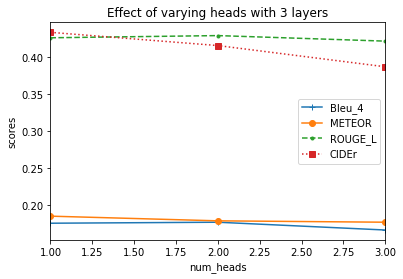

Fixed Number of layers:  5


,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr,num_layers
num_heads,,,,,,,,
1.0,0.588656,0.403763,0.270567,0.178124,0.186499,0.430255,0.443502,5.0
2.0,0.572450,0.390381,0.256184,0.164005,0.179102,0.418984,0.404707,5.0
3.0,0.578905,0.393981,0.260807,0.169273,0.183595,0.425692,0.410287,5.0


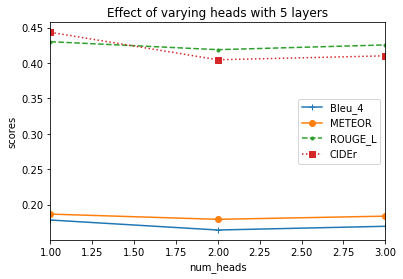

Fixed Number of layers:  7


,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr,num_layers
num_heads,,,,,,,,
1.0,0.601002,0.414493,0.274843,0.181629,0.183420,0.433461,0.452379,7.0
2.0,0.596777,0.411418,0.274775,0.179148,0.179012,0.429064,0.421231,7.0
3.0,0.598423,0.411754,0.272693,0.177980,0.182364,0.429983,0.442620,7.0


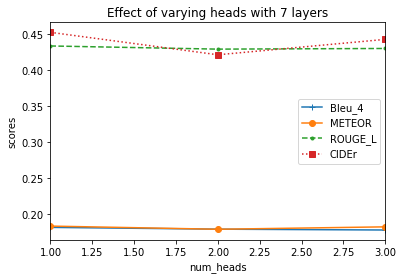

In [10]:
for num_layers in [3,5,7]:
  num_heads_df = df[(df['fine_tune'] == 0) & (df['encoder'] == 'resnet18') & (df['num_layers'] == num_layers)] \
    .sort_values(by=['num_heads']) \
    .drop(['date', 'experiment', 'epoch', 'loss', 'fine_tune', 'batch_size', 'encoder'], axis = 1) \
    .set_index('num_heads')

  print("==================================================")
  print("Fixed Number of layers: ", num_layers)
#   print(decoder_dim_df)
  display(HTML(num_heads_df.to_html()))
  
  ax = num_heads_df[['Bleu_4', 'METEOR', 'ROUGE_L', 'CIDEr']].plot(style=['+-','o-','.--','s:'])
  ax.set_ylabel("scores")
  ax.set_title(f"Effect of varying heads with {num_layers} layers")
  plt.show()